# Setup

# Setup

In [1]:
!pip install pyarrow

In [3]:
import numpy as np 
import pyarrow
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

In [57]:
number_of_bootstrap_samples = 500
percentile_method_alpha = 0.05

## Create Original Dataframe

In [3]:
df_original_data = pd.read_csv('../Data/haircut.csv')

## Original Dataframe Parameters

In [4]:
original_data_mean = df_original_data.mean()['Response (In Dollars)']

In [5]:
original_data_std_dev = df_original_data.std()['Response (In Dollars)']

## Create Bootstrap Sample Dataframe and Generate Samples

In [21]:
# Define a function that will sample, with replacement, from the original sample for the prescribed number of times.
def generage_bootstrap_samples(data):
    return np.random.choice(data, size=len(data), replace=True)

In [15]:
# Create our empty dataframe.
df_bootstrap_samples = pd.DataFrame(index=range(len(df_original_data)), columns=[f'Bootstrap Sample {i+1}' for i in range(number_of_bootstrap_samples)])

In [22]:
# Generate our samples.
for i in range(number_of_bootstrap_samples):
    bootstrap_sample_values = generage_bootstrap_samples(df_original_data['Response (In Dollars)'])
    df_bootstrap_samples[f'Bootstrap Sample {i+1}'] = bootstrap_sample_values

In [23]:
df_bootstrap_samples

,Bootstrap Sample 1,Bootstrap Sample 2,Bootstrap Sample 3,Bootstrap Sample 4,Bootstrap Sample 5,Bootstrap Sample 6,Bootstrap Sample 7,Bootstrap Sample 8,Bootstrap Sample 9,Bootstrap Sample 10,...,Bootstrap Sample 491,Bootstrap Sample 492,Bootstrap Sample 493,Bootstrap Sample 494,Bootstrap Sample 495,Bootstrap Sample 496,Bootstrap Sample 497,Bootstrap Sample 498,Bootstrap Sample 499,Bootstrap Sample 500
0,96,36,170,35,87,44,50,0,0,65,...,170,44,65,65,65,170,50,65,50,170
1,170,48,65,0,25,50,50,25,25,65,...,96,36,170,170,0,0,87,87,100,50
2,0,35,100,50,65,170,35,0,65,50,...,50,35,65,96,44,100,0,96,48,50
3,100,44,87,170,65,170,25,170,0,0,...,96,96,65,100,25,25,65,25,0,65
4,36,87,48,25,44,87,36,36,25,65,...,36,25,65,25,35,50,25,36,65,87
5,96,35,100,65,44,100,65,50,36,0,...,0,170,87,48,65,0,50,65,65,44
6,0,100,25,36,36,25,36,170,48,65,...,87,87,44,35,35,25,50,44,0,25
7,50,87,44,170,25,35,100,48,0,170,...,36,96,96,100,0,87,87,65,48,0
8,25,65,87,25,0,25,48,87,25,170,...,65,100,96,100,170,25,65,48,65,48
9,50,25,36,65,50,35,50,100,65,35,...,25,0,65,25,100,100,35,25,0,48


In [24]:
df_bootstrap_samples.to_csv('../Data/bootstrap_samples.csv')

## Generate Percentile Method Parameters

In [25]:
# Create our dataframe
df_parameter_estimates_percentile = pd.DataFrame(index=range(1, number_of_bootstrap_samples + 1), columns=['Original Index', 'Sample Mean', 'Sample Mean Rank', 'Sample Standard Deviation', 'Sample Standard Deviation Rank'])

In [31]:
# Populate the DataFrame with the parameter values.
for i in range(1, number_of_bootstrap_samples + 1):
    # Get the i-th bootstrap sample from our bootstrap samples dataframe.
    bootstrap_sample = df_bootstrap_samples[f'Bootstrap Sample {i}']
    
    # Calculate the sample parameters.
    sample_mean = bootstrap_sample.mean()
    sample_standard_deviation = bootstrap_sample.std()
    
    # Populate DataFrame
    df_parameter_estimates_percentile.loc[i, 'Original Index'] = i
    df_parameter_estimates_percentile.loc[i, 'Sample Mean'] = sample_mean
    df_parameter_estimates_percentile.loc[i, 'Sample Standard Deviation'] = sample_standard_deviation

## Rank Order Percentile Parameter Values

In [41]:
# Rank order the sample means
df_parameter_estimates_percentile.sort_values(by='Sample Mean', inplace=True)
df_parameter_estimates_percentile['Sample Mean Rank'] = range(1, number_of_bootstrap_samples + 1)
df_parameter_estimates_percentile.sort_values(by='Original Index', inplace=True)

In [50]:
# Rank order the sample standard deviations
df_parameter_estimates_percentile.sort_values(by='Sample Standard Deviation', inplace=True)
df_parameter_estimates_percentile['Sample Standard Deviation Rank'] = range(1, number_of_bootstrap_samples + 1)
df_parameter_estimates_percentile.sort_values(by='Original Index', inplace=True)

In [56]:
# I want to verify that the minimum / maximum rank counts are 1, 500 as desired

# Get the minimum values for each column
min_values = df_parameter_estimates_percentile.min()

# Get the maximum values for each column
max_values = df_parameter_estimates_percentile.max()

print("Minimum values:")
print(min_values)

print("\nMaximum values:")
print(max_values)


Minimum values:
Original Index                            1
Sample Mean                            32.0
Sample Mean Rank                          1
Sample Standard Deviation         20.233871
Sample Standard Deviation Rank            1
dtype: object

Maximum values:
Original Index                          500
Sample Mean                            90.0
Sample Mean Rank                        500
Sample Standard Deviation         65.004908
Sample Standard Deviation Rank          500
dtype: object


In [64]:
lower_percentile_rank_value = int(np.floor(number_of_bootstrap_samples*(percentile_method_alpha/2) + 1))
upper_percentile_rank_value = int(np.floor(number_of_bootstrap_samples*(1 - percentile_method_alpha/2) + 1))

print(f'Percentile Method Alpha Value: {percentile_method_alpha}.')
print(f'Lower Percentile Rank Value: {lower_percentile_rank_value}.')
print(f'Upper Percentile Rank Value: {upper_percentile_rank_value}.')

Percentile Method Alpha Value: 0.05.
Lower Percentile Rank Value: 13.
Upper Percentile Rank Value: 488.


In [68]:
lower_percentile_sample_mean = df_parameter_estimates_percentile[df_parameter_estimates_percentile['Sample Mean Rank'] == lower_percentile_rank_value]['Sample Mean'].values[0]
lower_percentile_sample_mean_original_index_value = df_parameter_estimates_percentile[df_parameter_estimates_percentile['Sample Mean Rank'] == lower_percentile_rank_value]['Original Index'].values[0]
upper_percentile_sample_mean = df_parameter_estimates_percentile[df_parameter_estimates_percentile['Sample Mean Rank'] == upper_percentile_rank_value]['Sample Mean'].values[0]
upper_percentile_sample_mean_original_index_value = df_parameter_estimates_percentile[df_parameter_estimates_percentile['Sample Mean Rank'] == upper_percentile_rank_value]['Original Index'].values[0]

print(f'Percentile Method Confidence Interval: ({lower_percentile_sample_mean},{upper_percentile_sample_mean}).')
print(f'Lower Value Original Index: {lower_percentile_sample_mean_original_index_value}.')
print(f'Upper Value Original Index: {upper_percentile_sample_mean_original_index_value}.')

Percentile Method Confidence Interval: (37.53333333333333,77.93333333333334).
Lower Value Original Index: 147.
Upper Value Original Index: 300.


In [146]:
# Save to a dataframe
df_parameter_estimates_percentile.to_csv('../Data/Percentile Estimates Data.csv')

In [27]:
# Load the dataframe, if necessary
df_parameter_estimates_percentile = pd.read_csv('../Data/Percentile Estimates Data.csv').drop('Unnamed: 0', axis=1)

In [28]:
df_parameter_estimates_percentile

,Original Index,Sample Mean,Sample Mean Rank,Sample Standard Deviation,Sample Standard Deviation Rank
0,1,64.733333,389,52.326539,440
1,2,64.733333,390,28.636806,61
2,3,69.333333,447,38.038827,181
3,4,57.466667,278,48.466287,381
4,5,48.533333,112,23.335646,10
...,...,...,...,...,...
495,496,57.066667,269,56.493320,484
496,497,64.800000,392,39.918131,203
497,498,45.933333,77,25.880127,33
498,499,46.466667,80,35.381324,150


## Graph The Outcomes

### Percentile Method Means

In [175]:
# Our Confidence Interval Sample Values
lower_percentile_sample_row = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Mean Rank'] == lower_percentile_rank_value]
lower_percentile_sample_row_original_index = lower_percentile_sample_row.iloc[0]['Original Index']

upper_percentile_sample_row = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Mean Rank'] == upper_percentile_rank_value]
upper_percentile_sample_row_original_index = upper_percentile_sample_row.iloc[0]['Original Index']

# We want boxplots for these, so we'll fetch them from the original bootstrap sample list.
upper_percentile_bootstrap_sample = df_bootstrap_samples[f'Bootstrap Sample {upper_percentile_sample_row_original_index}']
lower_percentile_bootstrap_sample = df_bootstrap_samples[f'Bootstrap Sample {lower_percentile_sample_row_original_index}']

# We will include the 25th, 50th, and 75th percentile values for comparison.
percentile_sample_row_25 = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Mean Rank'] == int(np.floor(number_of_bootstrap_samples*0.25))]
percentile_sample_row_25_original_index = percentile_sample_row_25.iloc[0]['Original Index']
percentile_bootstrap_sample_25th = df_bootstrap_samples[f'Bootstrap Sample {percentile_sample_row_25_original_index}']

percentile_sample_row_50 = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Mean Rank'] == int(np.floor(number_of_bootstrap_samples*0.50))]
percentile_sample_row_50_original_index = percentile_sample_row_50.iloc[0]['Original Index']
percentile_bootstrap_sample_50th = df_bootstrap_samples[f'Bootstrap Sample {percentile_sample_row_50_original_index}']

percentile_sample_row_75 = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Mean Rank'] == int(np.floor(number_of_bootstrap_samples*0.75))]
percentile_sample_row_75_original_index = percentile_sample_row_75.iloc[0]['Original Index']
percentile_bootstrap_sample_75th = df_bootstrap_samples[f'Bootstrap Sample {percentile_sample_row_75_original_index}']

print(f'Lower Interval Index Value - Ranked Percentile Samples: {lower_percentile_rank_value}')
print(f'Lower Interval Index Value - Original Percentile Samples: {lower_percentile_sample_row_original_index} \n')

print(f'25th Percentile Index Value - Ranked Percentile Samples: {int(np.floor(number_of_bootstrap_samples*0.25))}')
print(f'25th Percentile Index Value - Original Percentile Samples: {percentile_sample_row_25_original_index} \n')

print(f'50th Percentile Index Value - Percentile Samples: {int(np.floor(number_of_bootstrap_samples*0.50))}')
print(f'50th Percentile Index Value - Original Percentile Samples: {percentile_sample_row_50_original_index} \n')

print(f'75th Percentile Index Value - Percentile Samples: {int(np.floor(number_of_bootstrap_samples*0.75))}')
print(f'75th Percentile Index Value - Original Percentile Samples: {percentile_sample_row_75_original_index}\n')

print(f'Upper Interval Index Value - Ranked Percentile Samples: {upper_percentile_rank_value}')
print(f'Upper Interval Index Value - Original Percentile Samples: {upper_percentile_sample_row_original_index} \n')

Lower Interval Index Value - Ranked Percentile Samples: 13
Lower Interval Index Value - Original Percentile Samples: 147 

25th Percentile Index Value - Ranked Percentile Samples: 125
25th Percentile Index Value - Original Percentile Samples: 138 

50th Percentile Index Value - Percentile Samples: 250
50th Percentile Index Value - Original Percentile Samples: 317 

75th Percentile Index Value - Percentile Samples: 375
75th Percentile Index Value - Original Percentile Samples: 135

Upper Interval Index Value - Ranked Percentile Samples: 488
Upper Interval Index Value - Original Percentile Samples: 300 



In [178]:
df_percentile_comparison = pd.DataFrame({
    'Original Sample': df_original_data['Response (In Dollars)'],
    'Lower Percentile Bootstrap Sample': lower_percentile_bootstrap_sample,
    'Upper Percentile Bootstrap Sample': upper_percentile_bootstrap_sample,
    '25th Percentile': percentile_bootstrap_sample_25th,
    '50th Percentile (Median)': percentile_bootstrap_sample_50th,
    '75th Percentile': percentile_bootstrap_sample_75th
})

In [179]:
# Save our dataframe to a csv file
df_percentile_comparison.to_csv('../Data/Percentile Comparison Samples.csv')

In [18]:
# Load the dataframe from the csv file (if necessary)
df_percentile_comparison = pd.read_csv('../Data/Percentile Comparison Samples.csv').drop('Unnamed: 0', axis=1)

In [21]:
df_percentile_comparison_renamed = df_percentile_comparison.copy().rename(columns={
    'Original Sample' : 'Original',
    'Lower Percentile Bootstrap Sample': 'Lower Bound',
    '25th Percentile' : '25%',
    '50th Percentile (Median)': 'Median',
    '75th Percentile' : '75%',
    'Upper Percentile Bootstrap Sample': 'Upper Bound'
})

In [22]:
df_percentile_comparison.mean()

Original Sample                      56.400000
Lower Percentile Bootstrap Sample    37.533333
Upper Percentile Bootstrap Sample    77.933333
25th Percentile                      49.333333
50th Percentile (Median)             55.733333
75th Percentile                      63.733333
dtype: float64

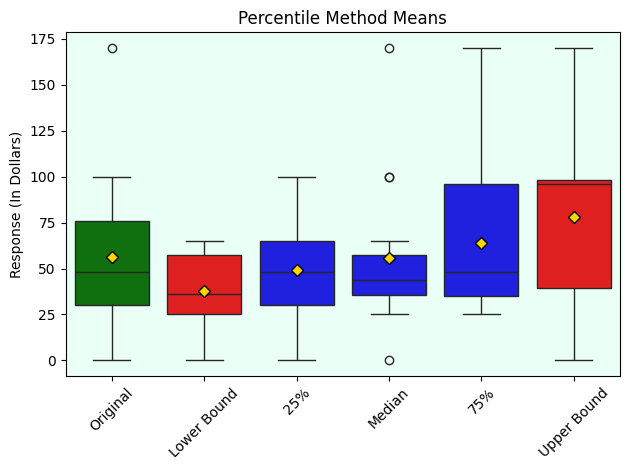

In [23]:
# I want to show the original and then the remaining samples in order of the sample mean.
order = ['Original', 'Lower Bound', '25%', 'Median', '75%', 'Upper Bound']

# Draw the boxplot
ax = sns.boxplot(data=df_percentile_comparison_renamed, order=order, palette=['g', 'r', 'r', 'b', 'b', 'b'], showmeans=True, meanprops={'marker':'D', 'markerfacecolor':'gold', 'markeredgecolor':'black'})
plt.xticks(rotation=45)

# Add grey background
ax.set_facecolor('#eafff5')

# Labels
ax.set_ylabel('Response (In Dollars)', color='black')

# Add Layout Setting & Title
plt.title('Percentile Method Means')
plt.tight_layout()

# Show the plot
plt.show()

## Percentile Method Standard Deviation

In [24]:
df_percentile_comparison.std()

Original Sample                      43.859842
Lower Percentile Bootstrap Sample    22.248167
Upper Percentile Bootstrap Sample    51.721047
25th Percentile                      31.927746
50th Percentile (Median)             40.689533
75th Percentile                      40.547092
dtype: float64

In [ ]:
# Our Confidence Interval Sample Values
lower_percentile_sample_row = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Mean Rank'] == lower_percentile_rank_value]
lower_percentile_sample_row_original_index = lower_percentile_sample_row.iloc[0]['Original Index']

upper_percentile_sample_row = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Mean Rank'] == upper_percentile_rank_value]
upper_percentile_sample_row_original_index = upper_percentile_sample_row.iloc[0]['Original Index']

# We want boxplots for these, so we'll fetch them from the original bootstrap sample list.
upper_percentile_bootstrap_sample = df_bootstrap_samples[f'Bootstrap Sample {upper_percentile_sample_row_original_index}']
lower_percentile_bootstrap_sample = df_bootstrap_samples[f'Bootstrap Sample {lower_percentile_sample_row_original_index}']

# We will include the 25th, 50th, and 75th percentile values for comparison.
percentile_sample_row_25 = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Mean Rank'] == int(np.floor(number_of_bootstrap_samples*0.25))]
percentile_sample_row_25_original_index = percentile_sample_row_25.iloc[0]['Original Index']
percentile_bootstrap_sample_25th = df_bootstrap_samples[f'Bootstrap Sample {percentile_sample_row_25_original_index}']

percentile_sample_row_50 = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Mean Rank'] == int(np.floor(number_of_bootstrap_samples*0.50))]
percentile_sample_row_50_original_index = percentile_sample_row_50.iloc[0]['Original Index']
percentile_bootstrap_sample_50th = df_bootstrap_samples[f'Bootstrap Sample {percentile_sample_row_50_original_index}']

percentile_sample_row_75 = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Mean Rank'] == int(np.floor(number_of_bootstrap_samples*0.75))]
percentile_sample_row_75_original_index = percentile_sample_row_75.iloc[0]['Original Index']
percentile_bootstrap_sample_75th = df_bootstrap_samples[f'Bootstrap Sample {percentile_sample_row_75_original_index}']

print(f'Lower Interval Index Value - Ranked Percentile Samples: {lower_percentile_rank_value}')
print(f'Lower Interval Index Value - Original Percentile Samples: {lower_percentile_sample_row_original_index} \n')

print(f'25th Percentile Index Value - Ranked Percentile Samples: {int(np.floor(number_of_bootstrap_samples*0.25))}')
print(f'25th Percentile Index Value - Original Percentile Samples: {percentile_sample_row_25_original_index} \n')

print(f'50th Percentile Index Value - Percentile Samples: {int(np.floor(number_of_bootstrap_samples*0.50))}')
print(f'50th Percentile Index Value - Original Percentile Samples: {percentile_sample_row_50_original_index} \n')

print(f'75th Percentile Index Value - Percentile Samples: {int(np.floor(number_of_bootstrap_samples*0.75))}')
print(f'75th Percentile Index Value - Original Percentile Samples: {percentile_sample_row_75_original_index}\n')

print(f'Upper Interval Index Value - Ranked Percentile Samples: {upper_percentile_rank_value}')
print(f'Upper Interval Index Value - Original Percentile Samples: {upper_percentile_sample_row_original_index} \n')

## Whitespace

In [66]:
df_parameter_estimates_percentile

,Original Index,Sample Mean,Sample Mean Rank,Sample Standard Deviation,Sample Standard Deviation Rank
1,1,64.733333,389,52.326539,440
2,2,64.733333,390,28.636806,61
3,3,69.333333,447,38.038827,181
4,4,57.466667,278,48.466287,381
5,5,48.533333,112,23.335646,10
...,...,...,...,...,...
496,496,57.066667,269,56.49332,484
497,497,64.8,392,39.918131,203
498,498,45.933333,77,25.880127,33
499,499,46.466667,80,35.381324,150


In [15]:
original_data_mean

56.4

In [19]:
original_data_std_dev

43.85984170383785

In [11]:
df_original_data.columns[1]

'Response (In Dollars)'